Netflix Shows and Movies Analysis

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Import Data

In [2]:
First_imdb_data = pd.read_csv('./ratingsData.csv')
First_imdb_data


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,tt0094675,7.4,9237.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8069.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2390861.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1252487.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,528882.0,NaN
...,...,...,...,...,...,...,...,...
21905,Cheat: Unfinished Business,tv,Reality-TV,2025.0,tt32249973,4.9,233.0,NaN
21906,Cold Case: The Tylenol Murders,tv,"Crime, Documentary",2025.0,tt36614653,6.5,2167.0,NaN
21907,NaN,tv,"Animation, Crime, Mystery",1996.0,NaN,NaN,NaN,NaN
21908,NaN,tv,NaN,2014.0,NaN,NaN,NaN,NaN


In [3]:
Second_netflix_data = pd.read_csv('./netflix_titles.csv')
Second_netflix_data


,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,titles,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,titles,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,titles,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,titles,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,titles,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,titles,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,titles,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,titles,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,titles,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Merge Data and Clean Data

In [4]:
##Clean Data 1 - IMDB
#remove select columns
clean_imdb_data = First_imdb_data.drop(columns=["availableCountries", "imdbNumVotes", "imdbId"])
#consistent column names
clean_imdb_data.rename(columns={'releaseYear': 'Year Released', 'imdbAverageRating': 'IMDB Score'}, inplace=True)

#clean_imdb_data"])

In [5]:
##Clean Data 2 - Netflix
#remove select columns
clean_netflix_data = Second_netflix_data.drop(columns=["Unnamed: 0", "show_id", "cast", "country", "date_added", "director"
])
#consistent column names - note: we made them the same in both datasets for easy merging
clean_netflix_data.rename(columns={'release_year': 'Year Released', 'listed_in': 'genres'}, inplace=True)
#clean_netflix_data

In [6]:
merged_data = pd.concat([clean_imdb_data, clean_netflix_data])
merged_data


,title,type,genres,Year Released,IMDB Score,rating,duration,description
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,7.4,NaN,NaN,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.4,NaN,NaN,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,NaN,NaN,NaN
3,American Beauty,movie,Drama,1999.0,8.3,NaN,NaN,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8802,Zodiac,Movie,"Cult Movies, Dramas, Thrillers",2007.0,NaN,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,TV Show,"Kids' TV, Korean TV Shows, TV Comedies",2018.0,NaN,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,Zombieland,Movie,"Comedies, Horror Movies",2009.0,NaN,R,88 min,Looking to survive in a world taken over by zo...
8805,Zoom,Movie,"Children & Family Movies, Comedies",2006.0,NaN,PG,88 min,"Dragged from civilian life, a former superhero..."


In [7]:
#Let's do NaNs first
#Fill NaNs in specific columns with a placeholder - we see NaNs in these columns, so let's use .fillna. In the parenthesis, we can tell it what we want to fill with
merged_data[['rating', 'duration', 'description']] = merged_data[['rating', 'duration', 'description']].fillna('-')

In [8]:
#Now, let's verify Column Data Types, then below we will update to an integer.
print("Data types before conversion:")
print(merged_data.dtypes)

Data types before conversion:
title             object
type              object
genres            object
Year Released    float64
IMDB Score       float64
rating            object
duration          object
description       object
dtype: object


In [9]:
#Update Year Released to be an integer
merged_data['Year Released'] = merged_data['Year Released'].astype('Int64')

In [10]:
#Do we have duplicate titles?  (ANSWER: Yes, about 5400 rows of them)
merged_data[merged_data['title'].duplicated()]

,title,type,genres,Year Released,IMDB Score,rating,duration,description
650,Brothers,movie,"Drama, Thriller, War",2009,7.1,-,-,-
1539,Shutter,movie,"Horror, Mystery, Thriller",2004,7.0,-,-,-
1549,Last Holiday,movie,"Comedy, Drama, Romance",2006,6.6,-,-,-
1590,My Girl,movie,"Comedy, Romance",2003,7.9,-,-,-
1599,Election,movie,"Crime, Drama, Thriller",2005,7.1,-,-,-
...,...,...,...,...,...,...,...,...
8791,Young Adult,Movie,"Comedies, Dramas, Independent Movies",2011,NaN,R,94 min,When a divorced writer gets a letter from an o...
8797,Zak Storm,TV Show,Kids' TV,2016,NaN,TV-Y7,3 Seasons,Teen surfer Zak Storm is mysteriously transpor...
8802,Zodiac,Movie,"Cult Movies, Dramas, Thrillers",2007,NaN,R,158 min,"A political cartoonist, a crime reporter and a..."
8804,Zombieland,Movie,"Comedies, Horror Movies",2009,NaN,R,88 min,Looking to survive in a world taken over by zo...


In [11]:
#We don't want to keep these duplicates, let's drop the one that doesn't have a description.  NOTE: if there is not a duplicate, the blank description will be retained.
#Sort so that rows a description come first
merged_data = merged_data.sort_values(by='description', ascending=False)

#drop duplicates based on 'title', keeping the one with a description
merged_data = merged_data.drop_duplicates(subset='title', keep='first')

merged_data

,title,type,genres,Year Released,IMDB Score,rating,duration,description
1224,Last Chance U: Basketball,TV Show,Docuseries,2021,NaN,TV-MA,1 Season,“Last Chance U” hits the hardwood in East Los ...
2530,White Lines,TV Show,"British TV Shows, Crime TV Shows, Internationa...",2020,NaN,TV-MA,1 Season,Zoe Walker leaves her quiet life behind to inv...
4338,Don't Go Breaking My Heart 2,Movie,"Comedies, International Movies, Romantic Movies",2014,NaN,TV-14,113 min,"Zixin is about to marry Qihong, but her galliv..."
1365,Zig & Sharko,TV Show,"Kids' TV, TV Comedies",2019,NaN,TV-Y7,2 Seasons,"Zig, an island-bound hyena, will do anything t..."
3470,Miniforce X,TV Show,"Kids' TV, Korean TV Shows",2018,NaN,TV-Y7,1 Season,Zenos wants to use the Earth’s negative energy...
...,...,...,...,...,...,...,...,...
4786,Felipe Esparza: They're Not Going to Laugh at You,Movie,Stand-Up Comedy,2012,NaN,TV-MA,58 min,"""Last Comic Standing"" winner Felipe Esparza ru..."
5820,Lavell Crawford: Can a Brother Get Some Love?,Movie,Stand-Up Comedy,2011,NaN,TV-MA,81 min,"""Last Comic Standing"" runner-up Lavell Crawfor..."
3376,My Next Guest with David Letterman and Shah Ru...,Movie,International Movies,2019,NaN,TV-PG,61 min,"""King of Bollywood"" Shah Rukh Khan opens up ab..."
5924,Chelsea Peretti: One of the Greats,Movie,Stand-Up Comedy,2014,NaN,TV-MA,75 min,"""Brooklyn Nine-Nine"" star Chelsea Peretti show..."


In [12]:
# Verify numbers
# 30717 total rows before this
#  5420 duplicates
# 25297 rows now
# the math works

Engineering Features & Functions

In [13]:
#Use of feature engineering to create ONE NEW COLUMN
#Let's see if the release year is in the 2010s
##If you use this, do some research to be able to explain the code
def is_from_2000s(year: [int]) -> bool:
    if pd.isna(year):
        return False
    return 2000 <= year <= 2025

merged_data['is_from_2000s'] = merged_data['Year Released'].apply(is_from_2000s)
#merged_data

In [14]:
#We can tidy that column name to be more consistent
merged_data.rename(columns={'is_from_2000s': 'Less than 25 Years Old'}, inplace=True)
merged_data

,title,type,genres,Year Released,IMDB Score,rating,duration,description,Less than 25 Years Old
1224,Last Chance U: Basketball,TV Show,Docuseries,2021,NaN,TV-MA,1 Season,“Last Chance U” hits the hardwood in East Los ...,True
2530,White Lines,TV Show,"British TV Shows, Crime TV Shows, Internationa...",2020,NaN,TV-MA,1 Season,Zoe Walker leaves her quiet life behind to inv...,True
4338,Don't Go Breaking My Heart 2,Movie,"Comedies, International Movies, Romantic Movies",2014,NaN,TV-14,113 min,"Zixin is about to marry Qihong, but her galliv...",True
1365,Zig & Sharko,TV Show,"Kids' TV, TV Comedies",2019,NaN,TV-Y7,2 Seasons,"Zig, an island-bound hyena, will do anything t...",True
3470,Miniforce X,TV Show,"Kids' TV, Korean TV Shows",2018,NaN,TV-Y7,1 Season,Zenos wants to use the Earth’s negative energy...,True
...,...,...,...,...,...,...,...,...,...
4786,Felipe Esparza: They're Not Going to Laugh at You,Movie,Stand-Up Comedy,2012,NaN,TV-MA,58 min,"""Last Comic Standing"" winner Felipe Esparza ru...",True
5820,Lavell Crawford: Can a Brother Get Some Love?,Movie,Stand-Up Comedy,2011,NaN,TV-MA,81 min,"""Last Comic Standing"" runner-up Lavell Crawfor...",True
3376,My Next Guest with David Letterman and Shah Ru...,Movie,International Movies,2019,NaN,TV-PG,61 min,"""King of Bollywood"" Shah Rukh Khan opens up ab...",True
5924,Chelsea Peretti: One of the Greats,Movie,Stand-Up Comedy,2014,NaN,TV-MA,75 min,"""Brooklyn Nine-Nine"" star Chelsea Peretti show...",True


In [15]:
#FEATURE ENGINEERING 1
#Using Feature Engineering to get more info re: genres
print(merged_data['genres'].unique())

# .... OR.... play with them to see which you like and can explain ...
#print(sorted(merged_data['genres'].dropna().unique()))

['Docuseries' 'British TV Shows, Crime TV Shows, International TV Shows'
 'Comedies, International Movies, Romantic Movies' ...
 'Action, Fantasy, Romance'
 'Animation, Comedy, Adventure, Fantasy, Family'
 'Classic & Cult TV, Crime TV Shows, TV Dramas']


In [16]:
#THIS NEEDS SOME WORK


#FEATURE ENGINEERING 2
#Call out "long" movies - movies over 150 minutes
for _, row in merged_data.iterrows():
# ^^^ this line may be new to you. It's saying:
#iterrows() is telling Python to go through the table one row at a time to look for what we tell it, in this case, duration
#The '_' represents the row number. Python is goign to be looking for perameters, using the underscore let's it know we are intentional in this request.
#    minutes = long_movies(row['duration'])
#    if minutes > 150:
#        print(f"{row['title']} — {minutes} minutes")


#I recommend, for your interview, being able to speak to this code and how you could change it or write new to give the total number of movies over 150 minutes

_IncompleteInputError: incomplete input (3094853568.py, line 15)

In [ ]:
#FEATURE ENGINEERING 3
#Let's give a rating to IMDB Scores
def rate_movie(score):
    if score >= 8.5:
        return "Excellent"
    elif score >= 7:
        return "Good"
    elif score >= 5:
        return "Average"
    else:
        return "Bad"

#This will create a new column - we need this to do the counts.
merged_data['Rating Category'] = merged_data['IMDB Score'].apply(rate_movie)

# Now count how many of each rating
rating_totals = merged_data['Rating Category'].value_counts()
print("Rating Category, Total Movies")
print(rating_totals)

Rating Category, Total Movies
Rating Category
Bad          11322
Average       9159
Good          4609
Excellent      207
Name: count, dtype: int64


In [ ]:
merged_data

,title,type,genres,Year Released,IMDB Score,rating,duration,description,Less than 25 Years Old,Rating Category
1224,Last Chance U: Basketball,TV Show,Docuseries,2021,NaN,TV-MA,1 Season,“Last Chance U” hits the hardwood in East Los ...,True,Bad
2530,White Lines,TV Show,"British TV Shows, Crime TV Shows, Internationa...",2020,NaN,TV-MA,1 Season,Zoe Walker leaves her quiet life behind to inv...,True,Bad
4338,Don't Go Breaking My Heart 2,Movie,"Comedies, International Movies, Romantic Movies",2014,NaN,TV-14,113 min,"Zixin is about to marry Qihong, but her galliv...",True,Bad
1365,Zig & Sharko,TV Show,"Kids' TV, TV Comedies",2019,NaN,TV-Y7,2 Seasons,"Zig, an island-bound hyena, will do anything t...",True,Bad
3470,Miniforce X,TV Show,"Kids' TV, Korean TV Shows",2018,NaN,TV-Y7,1 Season,Zenos wants to use the Earth’s negative energy...,True,Bad
...,...,...,...,...,...,...,...,...,...,...
4786,Felipe Esparza: They're Not Going to Laugh at You,Movie,Stand-Up Comedy,2012,NaN,TV-MA,58 min,"""Last Comic Standing"" winner Felipe Esparza ru...",True,Bad
5820,Lavell Crawford: Can a Brother Get Some Love?,Movie,Stand-Up Comedy,2011,NaN,TV-MA,81 min,"""Last Comic Standing"" runner-up Lavell Crawfor...",True,Bad
3376,My Next Guest with David Letterman and Shah Ru...,Movie,International Movies,2019,NaN,TV-PG,61 min,"""King of Bollywood"" Shah Rukh Khan opens up ab...",True,Bad
5924,Chelsea Peretti: One of the Greats,Movie,Stand-Up Comedy,2014,NaN,TV-MA,75 min,"""Brooklyn Nine-Nine"" star Chelsea Peretti show...",True,Bad


Visualizations

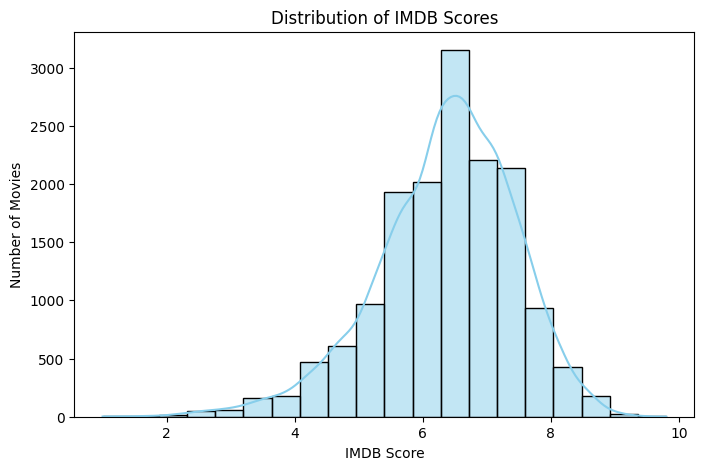

In [ ]:
#Histogram of IMDB Scores
plt.figure(figsize=(8,5))
sns.histplot(merged_data['IMDB Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Number of Movies')
plt.show()

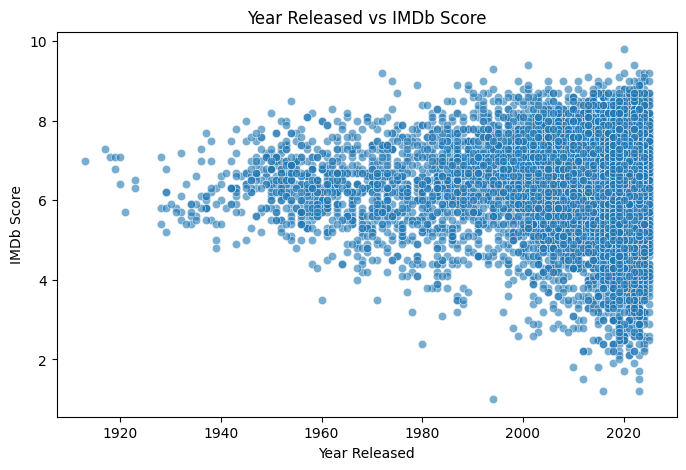

In [ ]:
#Scatter Plot of Year Released vs IMDB Score
#merged_data_reset = merged_data.reset_index(drop=True)


plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_data_reset, x='Year Released', y='IMDB Score', alpha=0.6)
plt.title('Year Released vs IMDb Score')
plt.xlabel('Year Released')
plt.ylabel('IMDb Score')
plt.show()

In [ ]:
#Filter valid ratings
#valid_ratings = ['TV-MA', 'TV-14', 'TV-Y7', 'PG', 'G', 'R', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'PG-13', 'TV-Y7-FV', 'UR', 'NC-17']
#filtered_data = merged_data[merged_data['rating'].isin(valid_ratings)]

# Count number of movies by year and rating
#counts = filtered_data.groupby(['Year Released', 'rating']).size().unstack(fill_value=0)

# Plot stacked bar chart (you can also do side-by-side with kind='bar')
counts.plot(kind='bar', stacked=True, figsize=(15,7), width=0.8)
plt.title('Number of Movies by Rating Over Years')
plt.xlabel('Year Released')
plt.ylabel('Number of Movies')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Code below is breakdown of above code - done because i could not get code to work

In [ ]:
#Filter valid ratings
#valid_ratings = ['TV-MA', 'TV-14', 'TV-Y7', 'PG', 'G', 'R', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'PG-13', 'TV-Y7-FV', 'UR', 'NC-17']
filtered_data = merged_data[merged_data['rating'].isin(valid_ratings)]

In [ ]:
# Count number of movies by year and rating
counts = filtered_data.groupby(['Year Released', 'rating']).size().unstack(fill_value=0)

In [ ]:
# Plot stacked bar chart (you can also do side-by-side with kind='bar')
counts.plot(kind='bar', stacked=True, figsize=(15,7), width=0.8)
plt.title('Number of Movies by Rating Over Years')
plt.xlabel('Year Released')
plt.ylabel('Number of Movies')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'counts' is not defined